In [1]:
# Read into a dataframe a CSV dataset with 10 example offices 
# described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).

# Library Imports.
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [ ]:
# Read a CSV dataset with 10 example offices into a dataframe.
# The data is described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).


# Read csv file into a dataframe.
df = pd.read_csv('CreditRisk_Clean_1-3_NewFeatures.csv')
df.head(10)

In [ ]:
# find out how many rows to calculate percentages when creating trainning and testing datasets
len(df.index)

# (1.1) Randomly shuffle the rows of dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [ ]:
# Random shuffling of the rows in the data frame - so as to be fair in our selection of the trainning and test data

df = df.reindex(np.random.permutation(df.index))
df.head(10)

In [ ]:
# create variable to obtain what the 70% of the data set is
seventy_percent = round(len(df.index)/100*70)

# Create dataframe with the first 70% of the data and show the first 10 rows - this dataframe will be the trainning data
df_train = df[0:seventy_percent]
df_train.head(10)

In [ ]:
# double check that it is infact 70 percent
print(len(df_train.index) == seventy_percent)
print(len(df_train.index))

In [ ]:
# Create df_test as the remaining 30% of the data frame to apply the testing of the model

df_test = df[seventy_percent:]
print(len(df_test))
df_test.head(10)

In [ ]:
# Ensure that the two dataframes created are indeed 70% and 30% and add up to the total of rows
# 100% of the dataframe was 937 rows - above shows 656 rows for the 70% df and 281 rows for the 30% df totaling 937 rows
# or 100%

print((seventy_percent) + round(len(df.index)/100*30))
print(len(df_test) + len(df_train))

In [ ]:
# Write the training and test dataframe to individual csv files to ensure data continuity
df_train.to_csv('Train.csv', index=False)
df_test.to_csv('Test.csv', index=False)

# - (1.2) On the training set:
## - Plot the correlations between all the continuous features. Discuss what you see in these plots.

In [2]:
# Read Training data frame from csv file into a dataframe.
df_train = pd.read_csv('Train.csv')

In [3]:
# Check which are the continuous features
df_train.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden              float64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text xticklabel objects>)

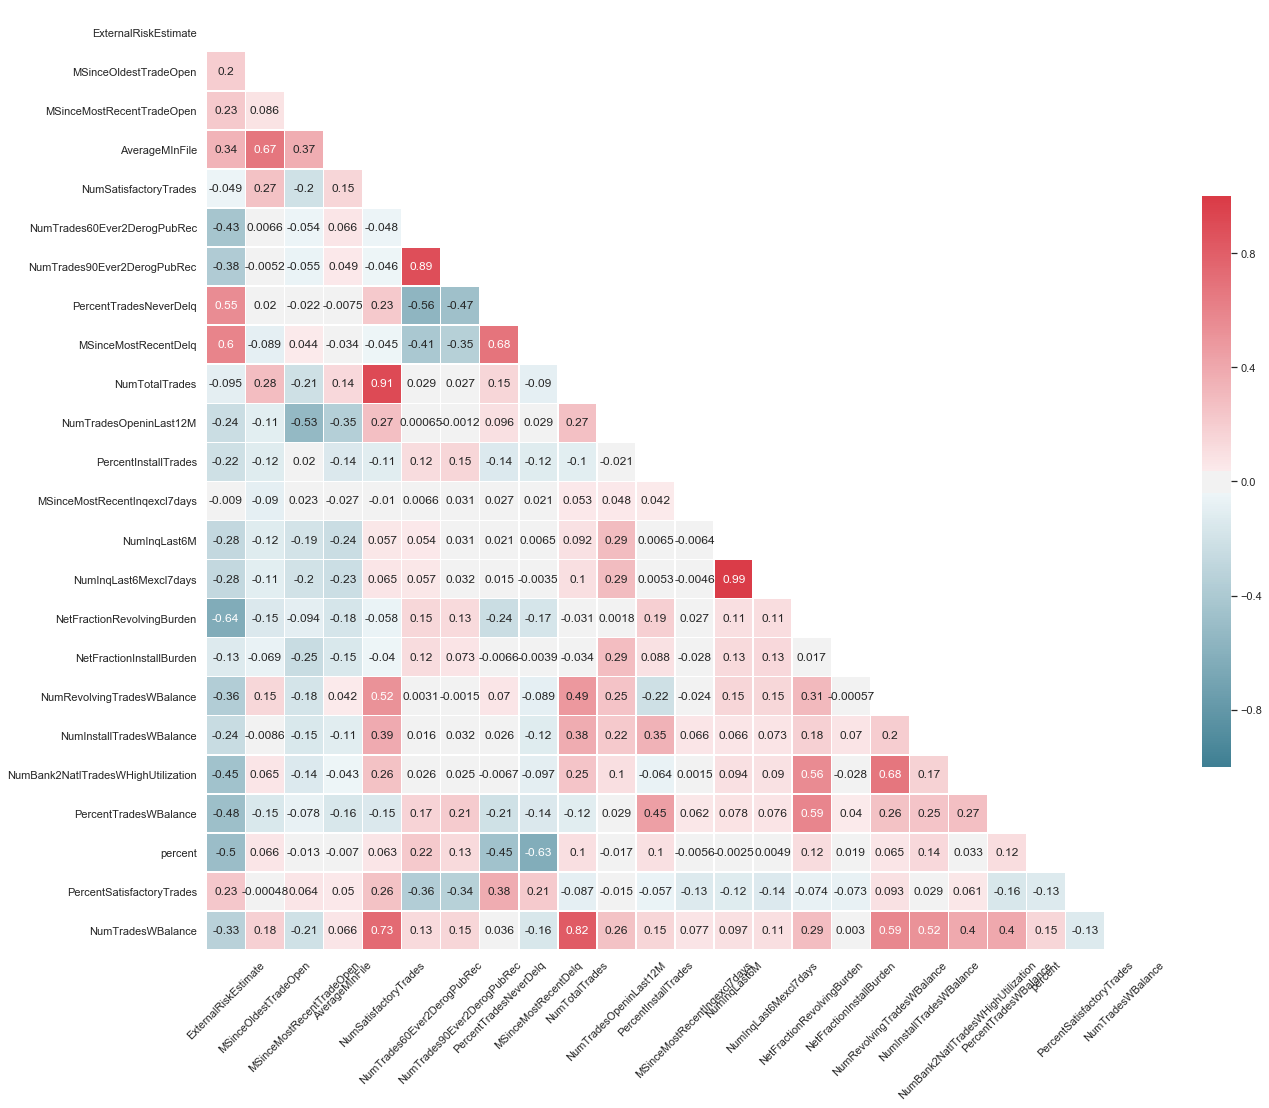

In [4]:
# # Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
df_continuous_columns = df_train.select_dtypes(include=['int64', 'float64'])

# Drop MaxDelq2PublicRecLast12M and MaxDelqEver as eventhough of numerical nature each number is a meaning therefore 
# the features are categorical
df_continuous_columns = df_continuous_columns.drop('MaxDelq2PublicRecLast12M', 1)
df_continuous_columns = df_continuous_columns.drop('MaxDelqEver', 1)

# Calculate correlation of all pairs of continuous features
corr = df_continuous_columns.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 21))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)



- A scatter plot matrix was attempted in order to map the correlation between all the continous features. 

- TA tanh has advised that a heat map should be obtained from all the continuous features to show correlation between all the features and from the heatmap the ones with the biggest correlations should be charted with an individual scatter plott as creating a scatter plot matrix was not displaying correctly in jupyter notebooks due to the sheer amount of them.

- Same issue though in a much reduced manner compared to the scatter plot matrix occurrs with the heatmap. It is appreciated that the feature labels in the x-axis are not properly aligned.  

In [5]:
# Additionally Look at correlations for all the continuous features in table form.
df_continuous_columns.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,PercentSatisfactoryTrades,NumTradesWBalance
ExternalRiskEstimate,1.000000,0.196834,0.225939,0.342118,-0.049495,-0.430021,-0.379599,0.552049,0.597946,-0.094914,...,-0.277741,-0.638347,-0.127016,-0.362181,-0.242844,-0.453975,-0.483510,-0.497267,0.233339,-0.333078
MSinceOldestTradeOpen,0.196834,1.000000,0.085740,0.674813,0.265429,0.006608,-0.005169,0.020178,-0.089120,0.284384,...,-0.105396,-0.146820,-0.069385,0.148293,-0.008569,0.065367,-0.148800,0.066146,-0.000480,0.183777
MSinceMostRecentTradeOpen,0.225939,0.085740,1.000000,0.370006,-0.204107,-0.053699,-0.054853,-0.021931,0.043709,-0.211218,...,-0.196841,-0.094271,-0.249767,-0.182090,-0.150344,-0.136752,-0.078035,-0.013222,0.064029,-0.207574
AverageMInFile,0.342118,0.674813,0.370006,1.000000,0.149867,0.065949,0.048529,-0.007534,-0.034170,0.135032,...,-0.226674,-0.175890,-0.148548,0.042399,-0.113222,-0.043070,-0.157847,-0.007045,0.050394,0.065987
NumSatisfactoryTrades,-0.049495,0.265429,-0.204107,0.149867,1.000000,-0.048037,-0.045743,0.226355,-0.044942,0.913831,...,0.064761,-0.058203,-0.040457,0.522170,0.386087,0.263250,-0.146720,0.062811,0.257979,0.734682
NumTrades60Ever2DerogPubRec,-0.430021,0.006608,-0.053699,0.065949,-0.048037,1.000000,0.887266,-0.560601,-0.410588,0.028848,...,0.056982,0.145148,0.121673,0.003085,0.016186,0.026142,0.171783,0.219924,-0.359912,0.130942
NumTrades90Ever2DerogPubRec,-0.379599,-0.005169,-0.054853,0.048529,-0.045743,0.887266,1.000000,-0.470160,-0.350369,0.027250,...,0.032404,0.127844,0.073112,-0.001504,0.031792,0.024586,0.209805,0.132219,-0.341276,0.149025
PercentTradesNeverDelq,0.552049,0.020178,-0.021931,-0.007534,0.226355,-0.560601,-0.470160,1.000000,0.681610,0.151682,...,0.015202,-0.241173,-0.006593,0.070141,0.025905,-0.006726,-0.206294,-0.453342,0.376470,0.035720
MSinceMostRecentDelq,0.597946,-0.089120,0.043709,-0.034170,-0.044942,-0.410588,-0.350369,0.681610,1.000000,-0.089905,...,-0.003543,-0.173077,-0.003859,-0.089142,-0.122225,-0.096565,-0.141271,-0.629630,0.211727,-0.160692
NumTotalTrades,-0.094914,0.284384,-0.211218,0.135032,0.913831,0.028848,0.027250,0.151682,-0.089905,1.000000,...,0.104185,-0.031396,-0.033860,0.485934,0.380996,0.245937,-0.115242,0.102956,-0.087406,0.816918


### Select only the features that have a correlation of 0.5 and more but not the ones that are the same and from -0.5 to -1

- If any of the column has no correlation of 0.5 or more drop the column

- We select the correlation features that are over 0.50 as according to https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/ coefficients of .50 and above represent a large association or relationship while correlation coefficients between .10 and .29 represent a small association, coefficients between .30 and .49 represent a medium association. **Essentially we are looking for strong correlation only**. Same for negative correlation.

In [6]:
# We select the correlation features that are over 0.50 to 1 and from -0.5 to -1

relevant_features = corr[((corr > 0.5) & (corr < 1)) | ((corr < -0.5) & (corr > -1))]
relevant_features

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,PercentSatisfactoryTrades,NumTradesWBalance
ExternalRiskEstimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552049,0.597946,NaN,...,NaN,-0.638347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceOldestTradeOpen,NaN,NaN,NaN,0.674813,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentTradeOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageMInFile,NaN,0.674813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSatisfactoryTrades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.913831,...,NaN,NaN,NaN,0.522170,NaN,NaN,NaN,NaN,NaN,0.734682
NumTrades60Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,NaN,0.887266,-0.560601,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTrades90Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,0.887266,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PercentTradesNeverDelq,0.552049,NaN,NaN,NaN,NaN,-0.560601,NaN,NaN,0.681610,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentDelq,0.597946,NaN,NaN,NaN,NaN,NaN,NaN,0.681610,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62963,NaN,NaN
NumTotalTrades,NaN,NaN,NaN,NaN,0.913831,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.816918


In [7]:
relevant_features[relevant_features[relevant_features.columns[0]].isna()==False][relevant_features.columns[0]]

PercentTradesNeverDelq        0.552049
MSinceMostRecentDelq          0.597946
NetFractionRevolvingBurden   -0.638347
Name: ExternalRiskEstimate, dtype: float64

In [8]:
# Select the features with the highest correlation
remove = []

for i in range(0,len(relevant_features.columns)):
    print("Feature is: ", relevant_features.columns[i])
    print(relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]])
    
    col = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==True][relevant_features.columns[i]]
    if col.size == 24:
        remove.append(relevant_features.columns[i])
        print("to be Removed: ", relevant_features.columns[i])
    print("\n" * 2)
    
# print(remove)

for i, k in enumerate(remove):
    relevant_features = relevant_features.drop(k, 1)
    relevant_features = relevant_features.drop(k, 0)

print("remove.lenght is: ", len(remove))   
print("Columns are: ", relevant_features.columns)
print("Size is: ", relevant_features.columns.size)
    

Feature is:  ExternalRiskEstimate
PercentTradesNeverDelq        0.552049
MSinceMostRecentDelq          0.597946
NetFractionRevolvingBurden   -0.638347
Name: ExternalRiskEstimate, dtype: float64



Feature is:  MSinceOldestTradeOpen
AverageMInFile    0.674813
Name: MSinceOldestTradeOpen, dtype: float64



Feature is:  MSinceMostRecentTradeOpen
NumTradesOpeninLast12M   -0.528433
Name: MSinceMostRecentTradeOpen, dtype: float64



Feature is:  AverageMInFile
MSinceOldestTradeOpen    0.674813
Name: AverageMInFile, dtype: float64



Feature is:  NumSatisfactoryTrades
NumTotalTrades                0.913831
NumRevolvingTradesWBalance    0.522170
NumTradesWBalance             0.734682
Name: NumSatisfactoryTrades, dtype: float64



Feature is:  NumTrades60Ever2DerogPubRec
NumTrades90Ever2DerogPubRec    0.887266
PercentTradesNeverDelq        -0.560601
Name: NumTrades60Ever2DerogPubRec, dtype: float64



Feature is:  NumTrades90Ever2DerogPubRec
NumTrades60Ever2DerogPubRec    0.887266
Name: NumTrad

In [9]:
relevant_features

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,NumTradesOpeninLast12M,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,NumTradesWBalance
ExternalRiskEstimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552049,0.597946,NaN,NaN,NaN,NaN,-0.638347,NaN,NaN,NaN,NaN,NaN,NaN
MSinceOldestTradeOpen,NaN,NaN,NaN,0.674813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentTradeOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.528433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageMInFile,NaN,0.674813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSatisfactoryTrades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.913831,NaN,NaN,NaN,NaN,0.522170,NaN,NaN,NaN,NaN,0.734682
NumTrades60Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,NaN,0.887266,-0.560601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTrades90Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,0.887266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PercentTradesNeverDelq,0.552049,NaN,NaN,NaN,NaN,-0.560601,NaN,NaN,0.681610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentDelq,0.597946,NaN,NaN,NaN,NaN,NaN,NaN,0.681610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.62963,NaN
NumTotalTrades,NaN,NaN,NaN,NaN,0.913831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.816918


In [10]:
needed = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].index
needed

Index(['MSinceOldestTradeOpen'], dtype='object')

In [11]:
values = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].values
values

array([0.67481302])

In [12]:
col_size = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].size
col_size

1

### Draw up Scatter Plots

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or 

FEATURE IS:  ExternalRiskEstimate
Needs to correlate with:  Index(['PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'NetFractionRevolvingBurden'],
      dtype='object')

Create correlation between: 
x is:  ExternalRiskEstimate
y is:  PercentTradesNeverDelq
value is:  0.5520488776949782

x is:  ExternalRiskEstimate
y is:  MSinceMostRecentDelq
value is:  0.5979455258006126

x is:  ExternalRiskEstimate
y is:  NetFractionRevolvingBurden
value is:  -0.63834737557774




x-----------------------------------------------------------------x
FEATURE IS:  MSinceOldestTradeOpen
Needs to correlate with:  Index(['AverageMInFile'], dtype='object')

Create correlation between: 
x is:  MSinceOldestTradeOpen
y is:  AverageMInFile
value is:  0.6748130221786628




x-----------------------------------------------------------------x
FEATURE IS:  MSinceMostRecentTradeOpen
Needs to correlate with:  Index(['NumTradesOpeninLast12M'], dtype='object')

Create correlation between: 
x is:  MSinceMostRecent

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches


x is:  NumSatisfactoryTrades
y is:  NumTradesWBalance
value is:  0.7346824823896824




x-----------------------------------------------------------------x
FEATURE IS:  NumTrades60Ever2DerogPubRec
Needs to correlate with:  Index(['NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq'], dtype='object')

Create correlation between: 
x is:  NumTrades60Ever2DerogPubRec
y is:  NumTrades90Ever2DerogPubRec
value is:  0.887266004694557

x is:  NumTrades60Ever2DerogPubRec
y is:  PercentTradesNeverDelq
value is:  -0.5606009291884876




x-----------------------------------------------------------------x
FEATURE IS:  NumTrades90Ever2DerogPubRec
Needs to correlate with:  Index(['NumTrades60Ever2DerogPubRec'], dtype='object')

Create correlation between: 
Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  PercentTradesNeverDelq
Needs to correlate with:  Index(['ExternalRiskEstimate', 'NumTrades60Ever2DerogPubRec',
       'MSinceMostRecentDel

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches





x-----------------------------------------------------------------x
FEATURE IS:  NumTradesOpeninLast12M
Needs to correlate with:  Index(['MSinceMostRecentTradeOpen'], dtype='object')

Create correlation between: 
Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  NumInqLast6M
Needs to correlate with:  Index(['NumInqLast6Mexcl7days'], dtype='object')

Create correlation between: 
x is:  NumInqLast6M
y is:  NumInqLast6Mexcl7days
value is:  0.9891686011782009




x-----------------------------------------------------------------x
FEATURE IS:  NumInqLast6Mexcl7days
Needs to correlate with:  Index(['NumInqLast6M'], dtype='object')

Create correlation between: 
Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  NetFractionRevolvingBurden
Needs to correlate with:  Index(['ExternalRiskEstimate', 'NumBank2NatlTradesWHighUtilization',
       'PercentTradesWBalance'],
      dtype='o

[('PercentTradesNeverDelq', 'ExternalRiskEstimate', 0.5520488776949782),
 ('MSinceMostRecentDelq', 'ExternalRiskEstimate', 0.5979455258006126),
 ('NetFractionRevolvingBurden', 'ExternalRiskEstimate', -0.63834737557774),
 ('AverageMInFile', 'MSinceOldestTradeOpen', 0.6748130221786628),
 ('NumTradesOpeninLast12M', 'MSinceMostRecentTradeOpen', -0.528432703925272),
 ('NumTotalTrades', 'NumSatisfactoryTrades', 0.913830534679265),
 ('NumRevolvingTradesWBalance', 'NumSatisfactoryTrades', 0.5221699376015894),
 ('NumTradesWBalance', 'NumSatisfactoryTrades', 0.7346824823896824),
 ('NumTrades90Ever2DerogPubRec',
  'NumTrades60Ever2DerogPubRec',
  0.887266004694557),
 ('PercentTradesNeverDelq',
  'NumTrades60Ever2DerogPubRec',
  -0.5606009291884876),
 ('MSinceMostRecentDelq', 'PercentTradesNeverDelq', 0.6816100781224738),
 ('percent', 'MSinceMostRecentDelq', -0.6296299895635973),
 ('NumTradesWBalance', 'NumTotalTrades', 0.8169176859425868),
 ('NumInqLast6Mexcl7days', 'NumInqLast6M', 0.989168601178

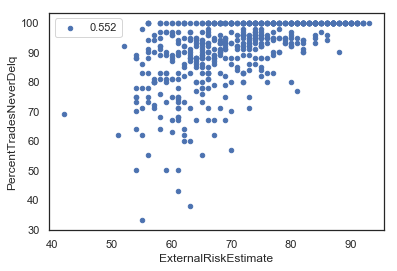

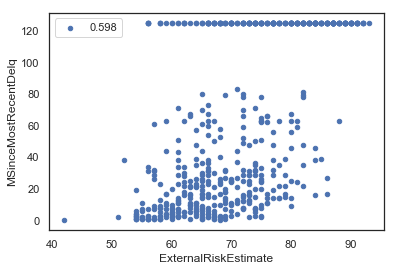

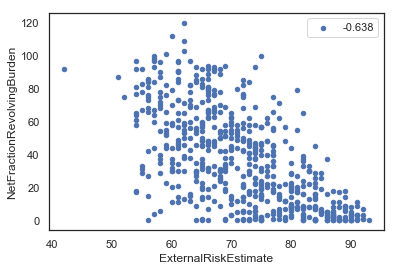

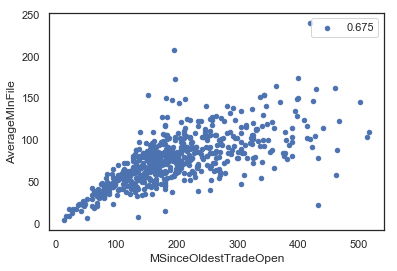

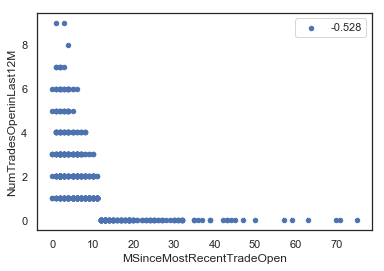

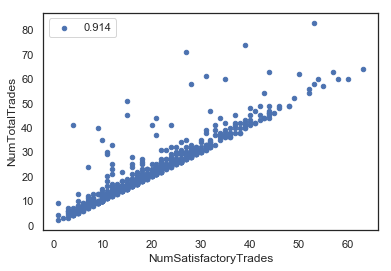

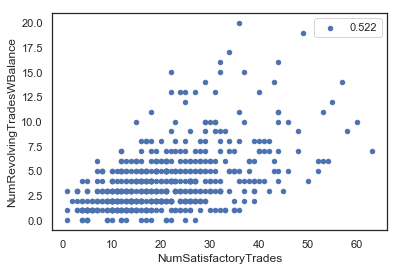

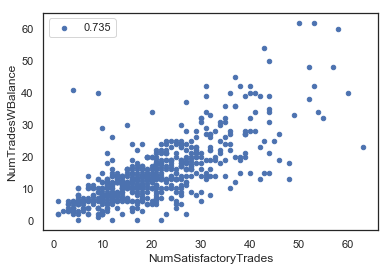

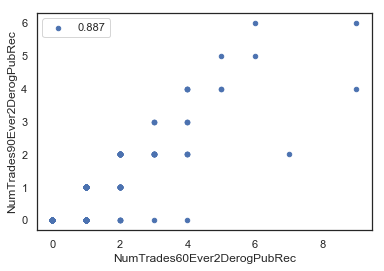

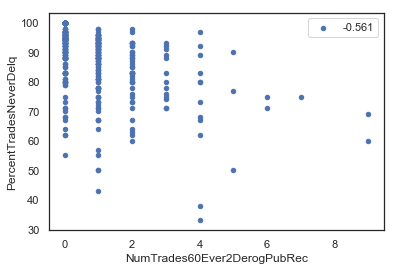

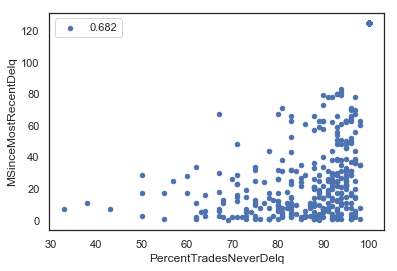

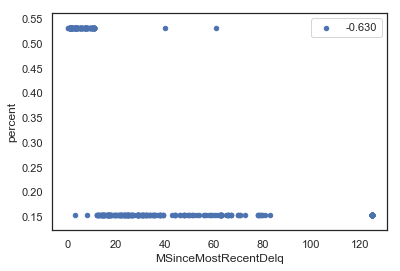

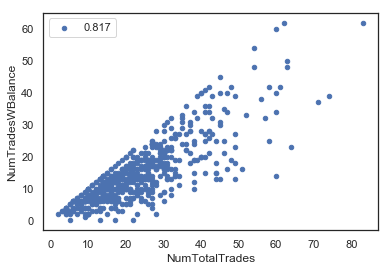

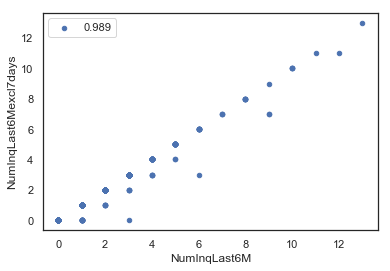

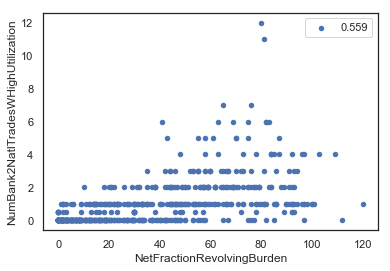

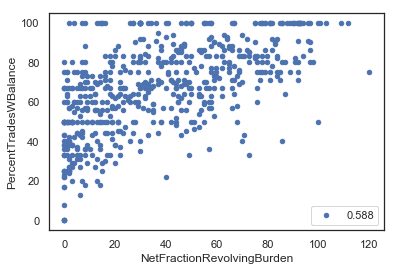

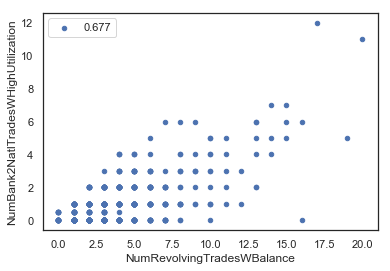

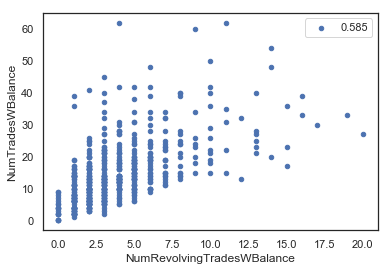

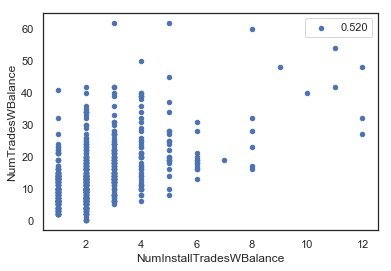

In [13]:
compare_list = []

# Select each column
for i in range(0,len(relevant_features.columns)):
    needed = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].index
    values = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].values
    print("FEATURE IS: ", relevant_features.columns[i])
    print("Needs to correlate with: ", needed)
    print()
    print("Create correlation between: ")
    
    # Select each needed row within each column
    for j in range(0, len(needed)):
        # if the correlation has already been plotted don't do it again
        if (relevant_features.columns[i], needed[j], values[j]) not in compare_list:
            print("x is: ", relevant_features.columns[i])
            print("y is: ", needed[j])
            print("value is: ", values[j])
            
            # Plot the scatter plot
            df_continuous_columns.plot(kind='scatter', x=relevant_features.columns[i], y=needed[j], label="%.3f" % df_continuous_columns[[relevant_features.columns[i], needed[j]]].corr().as_matrix()[0,1])
            
            # add the correlation to the list so that it is not plotted again
            compare_list.append((needed[j], relevant_features.columns[i], values[j]))
            print()
            
        # If they have already been checked print a message
        if (relevant_features.columns[i], needed[j], values[j]) in compare_list:
            print("Pair already checked!")
            print()
    print("\n" * 2)
    print("x" + "-" * 65 + "x")
    

# Show the comparison list for debugging purposes
compare_list

## The feature pairs that show the highest negative and positive correlations are:

In [14]:
#Checking what "percent" feature is all about
df_train['percent'].unique()

array([0.15267176, 0.53191489])

In [15]:
compare_list = sorted(compare_list, key=lambda value: value[2])
compare_list
for i in range(len(compare_list)):
    print("- ", compare_list[i][0], "with", compare_list[i][1], "= ", compare_list[i][2])
    print()


-  NetFractionRevolvingBurden with ExternalRiskEstimate =  -0.63834737557774

-  percent with MSinceMostRecentDelq =  -0.6296299895635973

-  PercentTradesNeverDelq with NumTrades60Ever2DerogPubRec =  -0.5606009291884876

-  NumTradesOpeninLast12M with MSinceMostRecentTradeOpen =  -0.528432703925272

-  NumTradesWBalance with NumInstallTradesWBalance =  0.5197355766123409

-  NumRevolvingTradesWBalance with NumSatisfactoryTrades =  0.5221699376015894

-  PercentTradesNeverDelq with ExternalRiskEstimate =  0.5520488776949782

-  NumBank2NatlTradesWHighUtilization with NetFractionRevolvingBurden =  0.5588053812028216

-  NumTradesWBalance with NumRevolvingTradesWBalance =  0.5854142516916797

-  PercentTradesWBalance with NetFractionRevolvingBurden =  0.5879119546791037

-  MSinceMostRecentDelq with ExternalRiskEstimate =  0.5979455258006126

-  AverageMInFile with MSinceOldestTradeOpen =  0.6748130221786628

-  NumBank2NatlTradesWHighUtilization with NumRevolvingTradesWBalance =  0.6768

The following Correlations do not provide any usefull information on risk as no feature on it's own makes reference to risk performance: 
- NumTradesWBalance with NumTotalTrades 
- AverageMInFile with MSinceOldestTradeOpen
- NumBank2NatlTradesWHighUtilization with NumRevolvingTradesWBalance
- PercentTradesWBalance with NetFractionRevolvingBurden
- NumTradesWBalance with NumRevolvingTradesWBalance
- NumTradesWBalance with NumInstallTradesWBalance

The continous features above have the potential to have a strong impact on risk:
- NEED TO FIND OUT WHAT THE FEATURE PERCENT IS ALL ABOUT AS CAN NOT FIND ANYTHING ABOUT IT TO COMMENT ON HIGHEST NEGATIVE CORRELATION

- NetFractionRevolvingBurden with ExternalRiskEstimate has a strong negative correlation and could indicate that when your balance in relation to your credit increases (ie. you owe more money) your FICO score decreases "Net Fraction Revolving Burden: When the net fraction revolving burden increases by 1 unit, meaning your balance in relation to your credit increases, the FICO score decreases on average by 0.95 points" (FICO CREDIT RISK DATA). As you owe more money it is logical to expect that your risk estimate from the external source will get worse and increase the risk however this correlation does not point to this logic. 

- There is a strong negative correlation between PercentTradesNeverDelq and NumTrades60Ever2DerogPubRec which indicates that the more Trades that are never delinquent the less trades that would be Derogatory over 60 days. We need to be carefull with this correlation as it implies that if you have a high percentage of never delinquent trades you are less likely to be 60 days delinquent however if you none or very few trades in total you may not have a solid and long history proving a good risk performance. 

- Correlation between NumInqLast6Mexcl7days with NumInqLast6M does not provide much information as the former feature seems to be just a subset of the latter feature. NumInqLast6M would be best used to predict impact on risk as it contains more information than NumInqLast6Mexcl7days.

- Strong correlation between NumTotalTrades with NumSatisfactoryTrades seems to indicate that just having a trade would equate to having a satisfactory trade however logic tells us that this is a case of Storks don't deliver babies as explained by Will Badr in: https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4. It is neccessary to point out the other side of the coin and take into account that lending has been and is profitable and worth while for companies therefore you'd expect that quite a high percentage of trades in general would be Satisfactory. 

- We find high correlation of 0.84 between NumTrades90Ever2DerogPubRec with NumTrades60Ever2DerogPubRec highlighting that once you are delinquent for a period of 60 days it is a good marker for furhter delinquency of up to at least 90 days. Due to the high correlation betwwen these features I believe that using NumTrades60Ever2DerogPubRec would give a more accurate prediction of risk as it logs data in advance of NumTrades90Ever2DerogPubRec.

- Correlation between NumTradesWBalance with NumSatisfactoryTrades indicates potentially having a balance in a contract means that it will be satisfactory in nature. We see the same reasoning of the storks and babies analogy and the profitability of lending argument made a couple of points above. 

- Correlation between MSinceMostRecentDelq with PercentTradesNeverDelq indicates that the more months that pass by with out being delinquent from the last delinquent trade equates to having less delinquent trades over all. I take this correlation to have a positive inpact in the prediction of risk. 

- Correlation between MSinceMostRecentDelq with ExternalRiskEstimate shows strong correlation with an external entity estimating the risk of trade. This correlation would have a sizeable inpact in the prediction of risk. an external risk stimation seems like good second opinion.

- Correlation between NumRevolvingTradesWBalance with NumSatisfactoryTrades indicates that the more trades of revolving nature(ie, credit cards) a client has the more likely they are to be satisfactory. This seem natural as a client with satisfactory credit worthiness would be able to obtain further trades compare to a client with insatisfactory trades. This correlation would also have an impact on risk prediction. 


## For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

- Change Target category values to continous values and type of feature from object to int64 in order to be able to plot correlation scatter plots between continous features and target feature
- Target feature value 'Good' is given the value 1 to keep positive numerical value and value 'Bad' is given the value 0 instead.

In [17]:
# change values and type of Target feature
df_train['RiskPerformance'] = df_train['RiskPerformance'].replace('Bad', 0)
df_train['RiskPerformance'] = df_train['RiskPerformance'].replace('Good', 1)
df_train['RiskPerformance'] = df_train['RiskPerformance'].astype('int64')

In [18]:
# Check that values and type has changed to desired
df_train['RiskPerformance'].head(10)

0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    1
8    1
9    1
Name: RiskPerformance, dtype: int64

In [19]:
df_train.columns[0]

'RiskPerformance'

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or 

Correlation for  ExternalRiskEstimate is:  0.47895264775937296

Correlation for  MSinceOldestTradeOpen is:  0.11706805730067685

Correlation for  MSinceMostRecentTradeOpen is:  0.1279956603116787

Correlation for  AverageMInFile is:  0.2680870659412381

Correlation for  NumSatisfactoryTrades is:  0.17026088858256272

Correlation for  NumTrades60Ever2DerogPubRec is:  -0.1896480968147172

Correlation for  NumTrades90Ever2DerogPubRec is:  -0.13545507409592938


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches


Correlation for  PercentTradesNeverDelq is:  0.28173992682652005

Correlation for  MSinceMostRecentDelq is:  0.29264900826518125

Correlation for  NumTotalTrades is:  0.12714606817497145

Correlation for  NumTradesOpeninLast12M is:  -0.10040944293000613

Correlation for  PercentInstallTrades is:  -0.1781222934547582

Correlation for  MSinceMostRecentInqexcl7days is:  0.04445618331588736

Correlation for  NumInqLast6M is:  -0.1704333352170543


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches


Correlation for  NumInqLast6Mexcl7days is:  -0.16858659962148628

Correlation for  NetFractionRevolvingBurden is:  -0.3353248840861762

Correlation for  NetFractionInstallBurden is:  -0.16284578908199898

Correlation for  NumRevolvingTradesWBalance is:  -0.12348965405220652

Correlation for  NumInstallTradesWBalance is:  -0.07189817834284862

Correlation for  NumBank2NatlTradesWHighUtilization is:  -0.25094966570573096

Correlation for  PercentTradesWBalance is:  -0.25709698382279933


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



Correlation for  percent is:  -0.21267411802530709

Correlation for  PercentSatisfactoryTrades is:  0.1357954027184845

Correlation for  NumTradesWBalance is:  -0.020296690123313598



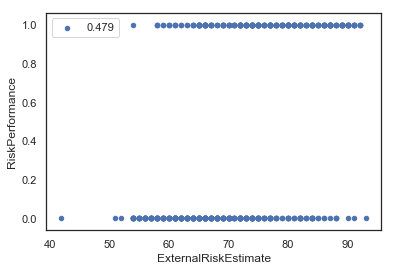

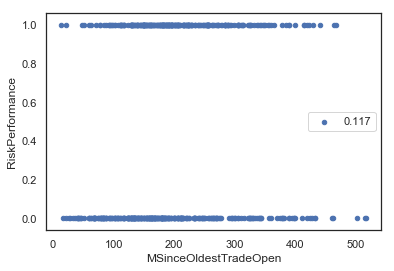

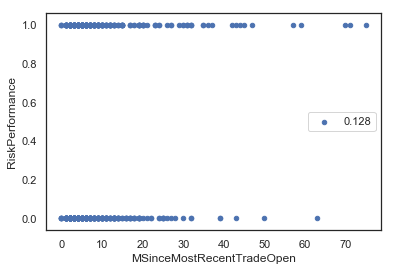

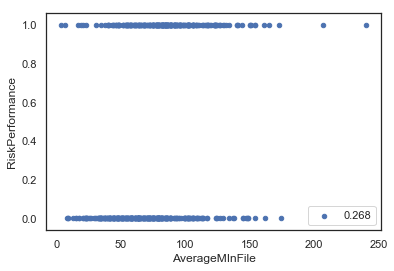

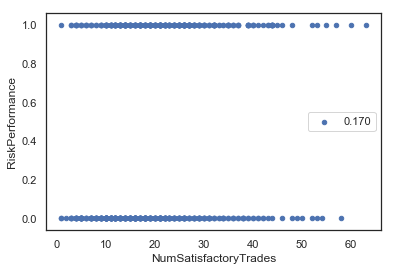

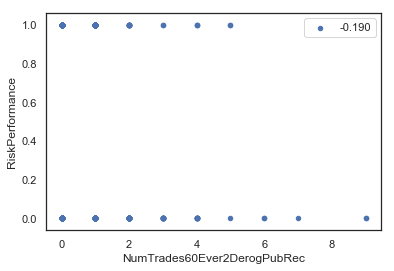

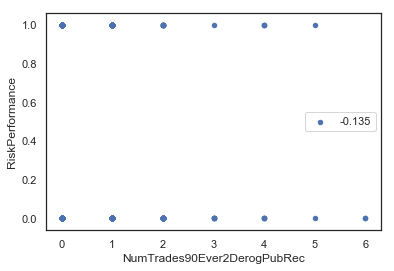

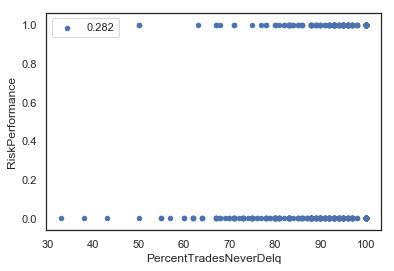

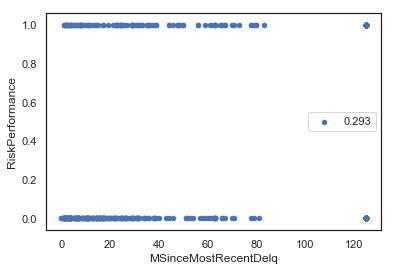

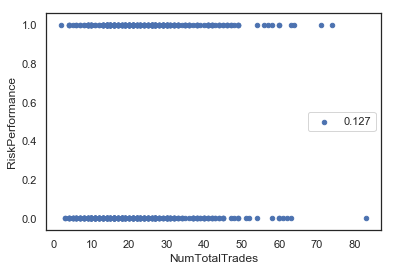

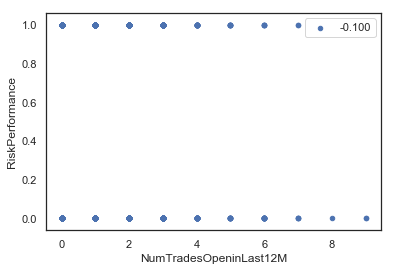

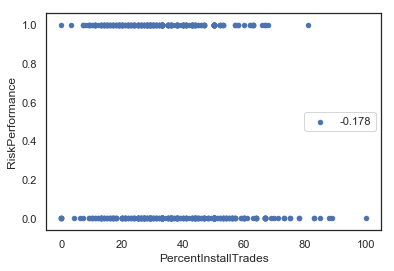

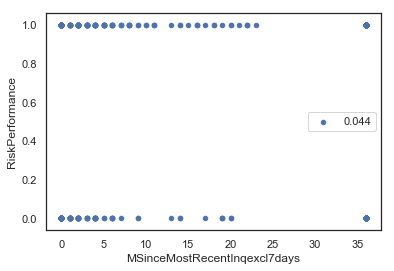

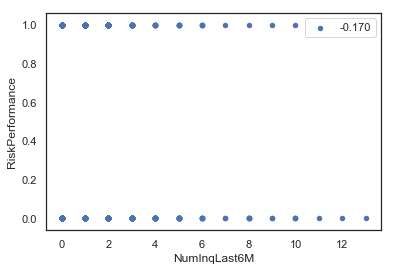

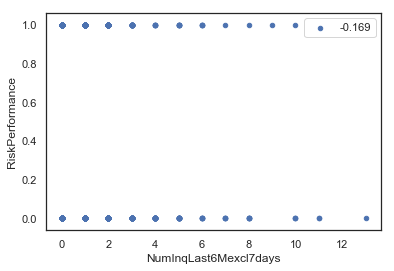

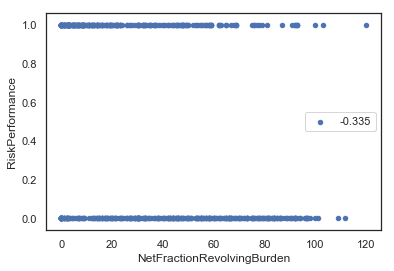

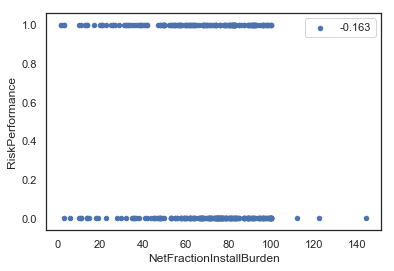

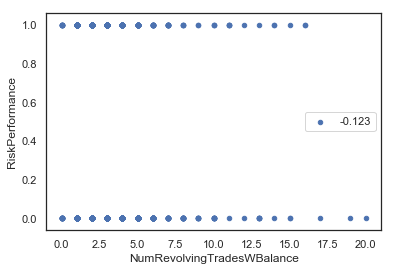

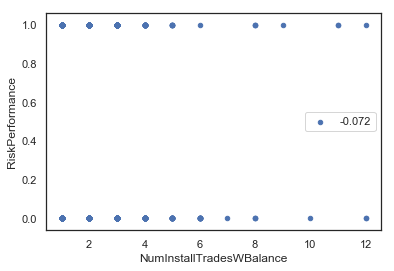

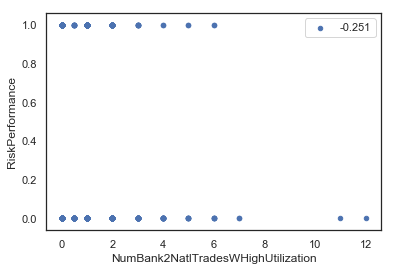

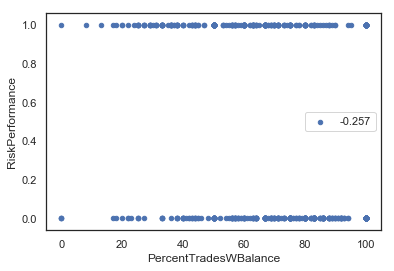

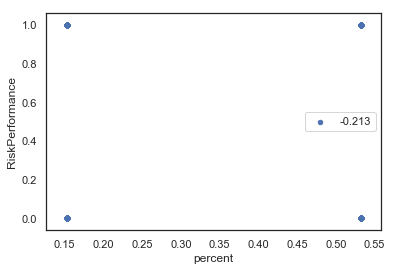

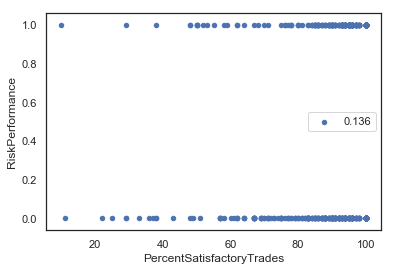

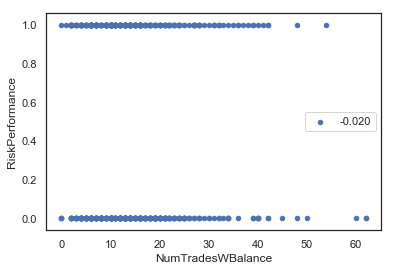

In [22]:
# plot correlations between continous features and target feature "RiskPerformance"
# add them to a list to be sorted
compare_list_risk = []

for i, k in enumerate(df_continuous_columns.columns):
        corrVriskPer = df_train[[k, 'RiskPerformance']].corr().as_matrix()[0,1]
        compare_list_risk.append((k, corrVriskPer))
        print("Correlation for ", k, "is: ",  corrVriskPer)
        df_train.plot(kind='scatter', x=df_continuous_columns.columns[i], y=df_train.columns[0], label="%.3f" % df_train[[df_continuous_columns.columns[i], df_train.columns[0]]].corr().as_matrix()[0,1])
        print()

In [21]:
# Sort and Print correlations

compare_list_risk = sorted(compare_list_risk, key=lambda value: value[1])
compare_list_risk

for i, k in enumerate(compare_list_risk): 
        print("Correlation against: ", compare_list_risk[i][0], "is:", compare_list_risk[i][1])

Correlation against:  NetFractionRevolvingBurden is: -0.3353248840861762
Correlation against:  PercentTradesWBalance is: -0.25709698382279933
Correlation against:  NumBank2NatlTradesWHighUtilization is: -0.25094966570573096
Correlation against:  percent is: -0.21267411802530709
Correlation against:  NumTrades60Ever2DerogPubRec is: -0.1896480968147172
Correlation against:  PercentInstallTrades is: -0.1781222934547582
Correlation against:  NumInqLast6M is: -0.1704333352170543
Correlation against:  NumInqLast6Mexcl7days is: -0.16858659962148628
Correlation against:  NetFractionInstallBurden is: -0.16284578908199898
Correlation against:  NumTrades90Ever2DerogPubRec is: -0.13545507409592938
Correlation against:  NumRevolvingTradesWBalance is: -0.12348965405220652
Correlation against:  NumTradesOpeninLast12M is: -0.10040944293000613
Correlation against:  NumInstallTradesWBalance is: -0.07189817834284862
Correlation against:  NumTradesWBalance is: -0.020296690123313598
Correlation against:  M